In [1]:
from pyforest import *
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv('Sonar.csv')
df

<IPython.core.display.Javascript object>

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,Rock
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,Rock
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,Rock
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,Rock
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,Rock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,Mine
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,Mine
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,Mine
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,Mine


In [3]:
df.shape

(208, 61)

In [4]:
df.isnull().sum()

attribute_1     0
attribute_2     0
attribute_3     0
attribute_4     0
attribute_5     0
               ..
attribute_57    0
attribute_58    0
attribute_59    0
attribute_60    0
class           0
Length: 61, dtype: int64

<IPython.core.display.Javascript object>

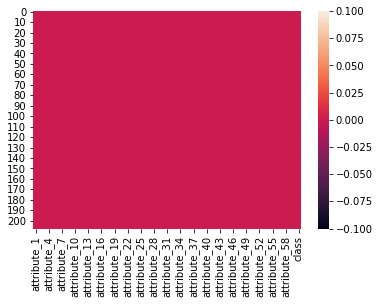

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.describe()

,attribute_1,attribute_2,attribute_3,attribute_4,attribute_5,attribute_6,attribute_7,attribute_8,attribute_9,attribute_10,...,attribute_51,attribute_52,attribute_53,attribute_54,attribute_55,attribute_56,attribute_57,attribute_58,attribute_59,attribute_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
df.dtypes
#All featues are of datatypes float64 except "Class" which is "object" type

attribute_1     float64
attribute_2     float64
attribute_3     float64
attribute_4     float64
attribute_5     float64
                 ...   
attribute_57    float64
attribute_58    float64
attribute_59    float64
attribute_60    float64
class            object
Length: 61, dtype: object

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

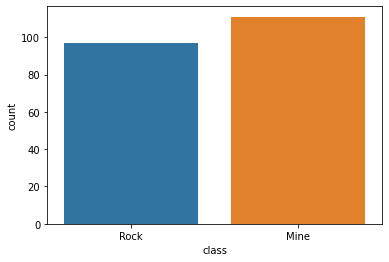

In [8]:
sns.countplot(x="class",data=df)
plt.show()

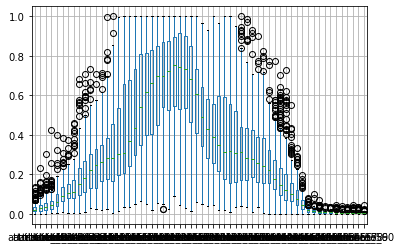

In [9]:
df.boxplot()

In [10]:
le=LabelEncoder()
le.fit(df['class'])
df['class']=le.transform(df['class'])
df['class']


0      1
1      1
2      1
3      1
4      1
      ..
203    0
204    0
205    0
206    0
207    0
Name: class, Length: 208, dtype: int32

In [11]:
z=np.abs(zscore(df))
df_final=df[(z<3).all(axis=1)]
print(df.shape)
print(df_final.shape)

<IPython.core.display.Javascript object>

(208, 61)
(168, 61)


In [12]:

#Lets seprate the input and output variable
x=df_final.drop(columns=["class"])
y=df_final[["class"]]
y


,class
0,1
1,1
4,1
6,1
7,1
...,...
203,0
204,0
205,0
206,0


In [36]:
from sklearn.metrics import accuracy_score

def max_accuracy_score(clf,x,y):
    max_aucroc_score=0
    for r_state in range(42,100):
        x_train, x_test, y_train, y_test = train_test_split(x, y,random_state = r_state,test_size=0.20,stratify=y)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(x_test)
        aucroc_scr=accuracy_score(y_test,y_pred)
        print("accuracyscore corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max accuracy score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [37]:

#lets use logistic regression
from sklearn.linear_model import LogisticRegression
lg_reg=LogisticRegression()
max_accuracy_score(lg_reg,x,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.8529411764705882
max accuracy score corresponding to  85  is  0.9117647058823529


85

In [15]:
def kfold(clf,x,y,):
    print("Mean roc auccuracy score for",clf,cross_val_score(clf,x,y,cv=5,scoring="accuracy").mean())
    print("standard deviation inaccuracy_scoref or",clf,cross_val_score(clf,x,y,cv=5,scoring="accuracy").std())
    print(cross_val_score(clf,x,y,cv=5,scoring="accuracy"))

In [16]:
kfold(lg_reg,x,y)

Mean roc auccuracy score for LogisticRegression() 0.6554367201426026
standard deviation inaccuracy_scoref or LogisticRegression() 0.18869555624020065
[0.52941176 0.82352941 0.5        0.93939394 0.48484848]


In [17]:
result=pd.DataFrame({"Model name":["LogisticRegression"],"accuracy":[0.9117647058823529],},index={'1'})
result

<IPython.core.display.Javascript object>

,Model name,accuracy
1,LogisticRegression,0.911765


In [18]:

#Lets use decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dct=DecisionTreeClassifier()
max_accuracy_score(dct,x,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.5882352941176471


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.5882352941176471


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.6470588235294118


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.6176470588235294


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.6470588235294118


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.5588235294117647


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.8529411764705882
max accuracy score corresponding to  47  is  0.8823529411764706


47

In [19]:
kfold(dct,x,y)

Mean roc auccuracy score for DecisionTreeClassifier() 0.6326203208556149
standard deviation inaccuracy_scoref or DecisionTreeClassifier() 0.127130094785068
[0.47058824 0.61764706 0.58823529 0.78787879 0.66666667]


In [20]:
dc_f=pd.DataFrame({"Model name":[dct],"accuracy":[ 0.8823529411764706],},index={'2'})
result=pd.concat([result,dc_f])
result=result[["Model name","accuracy"]]
result

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Model name,accuracy
1,LogisticRegression,0.911765
2,DecisionTreeClassifier(),0.882353


In [21]:

from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()
neighbors={"n_neighbors":range(1,30)}
clf = GridSearchCV(knc, neighbors, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'n_neighbors': 25}

In [22]:
#KNN classifier with n_neighbors=25
knc=KNeighborsClassifier(n_neighbors=25)
max_accuracy_score(knc,x,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.6176470588235294


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.5882352941176471


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.6470588235294118


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.5588235294117647


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.5588235294117647


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.6176470588235294


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.5


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.6176470588235294


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.6470588235294118


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.6470588235294118


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.5294117647058824


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.6470588235294118


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.6470588235294118


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.6470588235294118


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.6176470588235294


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.5


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.6176470588235294


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.6176470588235294


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.6176470588235294


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.6470588235294118


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.6764705882352942


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.6470588235294118


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.7058823529411765


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.5588235294117647


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.6764705882352942
max accuracy score corresponding to  60  is  0.8235294117647058


60

In [23]:
kfold(knc,x,y)

Mean roc auccuracy score for KNeighborsClassifier(n_neighbors=25) 0.5834224598930482
standard deviation inaccuracy_scoref or KNeighborsClassifier(n_neighbors=25) 0.11990831766555782
[0.55882353 0.67647059 0.5        0.75757576 0.42424242]


In [24]:
knn_f=pd.DataFrame({"Model name":[knc],"accuracy":[0.8235294117647058]},index={'3'})
result=pd.concat([result,knn_f])
result=result[["Model name","accuracy"]]
result

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Model name,accuracy
1,LogisticRegression,0.911765
2,DecisionTreeClassifier(),0.882353
3,KNeighborsClassifier(n_neighbors=25),0.823529


In [25]:
#Lets use SVM classifier
from sklearn.svm import SVC
svc=SVC()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svc, parameters, cv=5,scoring="f1")
clf.fit(x,y)
clf.best_params_

{'C': 1, 'kernel': 'poly'}

In [26]:
svc=SVC(kernel="poly",C=1)
max_accuracy_score(svc,x,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.9411764705882353


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.9411764705882353


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.9411764705882353


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.9411764705882353


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.8529411764705882
max accuracy score corresponding to  47  is  0.9411764705882353


47

In [27]:
kfold(svc,x,y)

Mean roc auccuracy score for SVC(C=1, kernel='poly') 0.7329768270944742
standard deviation inaccuracy_scoref or SVC(C=1, kernel='poly') 0.0956184691392432
[0.61764706 0.79411765 0.64705882 0.87878788 0.72727273]


In [28]:
svc_f=pd.DataFrame({"Model name":[svc],"accuracy":[0.9411764705882353]},index={'4'})
result=pd.concat([result,svc_f])
result=result[["Model name","accuracy"]]
result

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Model name,accuracy
1,LogisticRegression,0.911765
2,DecisionTreeClassifier(),0.882353
3,KNeighborsClassifier(n_neighbors=25),0.823529
4,"SVC(C=1, kernel='poly')",0.941176


In [29]:
from sklearn.ensemble import RandomForestClassifier
parameters={"n_estimators":[10,50,100,150,200,300,350,400,450,500]}
rf_clf=RandomForestClassifier()
clf = GridSearchCV(rf_clf, parameters, cv=5,scoring="accuracy")
clf.fit(x,y)
clf.best_params_

{'n_estimators': 300}

In [30]:

rmnd=RandomForestClassifier(n_estimators=400)
max_accuracy_score(rmnd,x,y)

<IPython.core.display.Javascript object>

accuracyscore corresponding to  42  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  43  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  44  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  45  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  46  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  47  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  48  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  49  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  50  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  51  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  52  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  53  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  54  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  55  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  56  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  57  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  58  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  59  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  60  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  61  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  62  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  63  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  64  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  65  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  66  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  67  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  68  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  69  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  70  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  71  is  0.7352941176470589


<IPython.core.display.Javascript object>

accuracyscore corresponding to  72  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  73  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  74  is  0.9411764705882353


<IPython.core.display.Javascript object>

accuracyscore corresponding to  75  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  76  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  77  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  78  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  79  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  80  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  81  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  82  is  0.8823529411764706


<IPython.core.display.Javascript object>

accuracyscore corresponding to  83  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  84  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  85  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  86  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  87  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  88  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  89  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  90  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  91  is  0.9411764705882353


<IPython.core.display.Javascript object>

accuracyscore corresponding to  92  is  0.8235294117647058


<IPython.core.display.Javascript object>

accuracyscore corresponding to  93  is  0.7941176470588235


<IPython.core.display.Javascript object>

accuracyscore corresponding to  94  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  95  is  0.8529411764705882


<IPython.core.display.Javascript object>

accuracyscore corresponding to  96  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  97  is  0.9117647058823529


<IPython.core.display.Javascript object>

accuracyscore corresponding to  98  is  0.7647058823529411


<IPython.core.display.Javascript object>

accuracyscore corresponding to  99  is  0.8235294117647058
max accuracy score corresponding to  74  is  0.9411764705882353


74

In [31]:
kfold(rmnd,x,y)

Mean roc auccuracy score for RandomForestClassifier(n_estimators=400) 0.7272727272727273
standard deviation inaccuracy_scoref or RandomForestClassifier(n_estimators=400) 0.12276632815334919
[0.52941176 0.79411765 0.58823529 0.87878788 0.75757576]


In [32]:
svc_f=pd.DataFrame({"Model name":["RandomForestClassifier(n_estimators=400)"],"accuracy":[0.9411764705882353]},index={'5'})
result=pd.concat([result,svc_f])
result=result[["Model name","accuracy"]]
result

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Model name,accuracy
1,LogisticRegression,0.911765
2,DecisionTreeClassifier(),0.882353
3,KNeighborsClassifier(n_neighbors=25),0.823529
4,"SVC(C=1, kernel='poly')",0.941176
5,RandomForestClassifier(n_estimators=400),0.941176


In [33]:

#From above table  accuracy_score RandomForestClassifier is performing the best 
#So we will choose that model
#max score is achived at random state 74
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 74,test_size=0.20,stratify=y)
rmnd.fit(x_train,y_train)
y_pred=svc.predict(x_test)

<IPython.core.display.Javascript object>

In [34]:

#Model performance
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17  0]
 [ 0 17]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        17

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



In [35]:
#Lets save the above model
import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(svc, 'sonar_org.pkl')

['sonar_org.pkl']